In [34]:
# pip install -r requirements.txt

In [5]:
from mingus.core import chords

result = chords.from_shorthand("Cmaj7")

print(result)

['C', 'E', 'G', 'B']


In [6]:
chord_progression = ["Cmaj7", "Cmaj7", "Fmaj7", "Gdom7"]

array_of_notes = []
for chord in chord_progression:
    array_of_notes.extend(chords.from_shorthand(chord))

print(array_of_notes)

['C', 'E', 'G', 'B', 'C', 'E', 'G', 'B', 'F', 'A', 'C', 'E', 'G', 'B', 'D', 'F']


In [7]:
from midiutil import MIDIFile
from mingus.core import chords

chord_progression = ["Cmaj7", "Cmaj7", "Fmaj7", "Gdom7"]

NOTES = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
OCTAVES = list(range(11))
NOTES_IN_OCTAVE = len(NOTES)

errors = {
    'notes': 'Bad input, please refer this spec-\n'
}


def swap_accidentals(note):
    if note == 'Db':
        return 'C#'
    if note == 'D#':
        return 'Eb'
    if note == 'E#':
        return 'F'
    if note == 'Gb':
        return 'F#'
    if note == 'G#':
        return 'Ab'
    if note == 'A#':
        return 'Bb'
    if note == 'B#':
        return 'C'

    return note


def note_to_number(note: str, octave: int) -> int:
    note = swap_accidentals(note)
    assert note in NOTES, errors['notes']
    assert octave in OCTAVES, errors['notes']

    note = NOTES.index(note)
    note += (NOTES_IN_OCTAVE * octave)

    assert 0 <= note <= 127, errors['notes']

    return note


array_of_notes = []
for chord in chord_progression:
    array_of_notes.extend(chords.from_shorthand(chord))

array_of_note_numbers = []
for note in array_of_notes:
    OCTAVE = 4
    array_of_note_numbers.append(note_to_number(note, OCTAVE))

track = 0
channel = 0
time = 0  # In beats
duration = 1  # In beats
tempo = 120  # In BPM
volume = 100  # 0-127, as per the MIDI standard

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
# automatically)
MyMIDI.addTempo(track, time, tempo)

for i, pitch in enumerate(array_of_note_numbers):
    MyMIDI.addNote(track, channel, pitch, time + i, duration, volume)

with open("pure-edm-fire-arpeggio.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

In [8]:
chord_progression = ["Cmaj7", "Cmaj7", "Fmaj7", "Gdom7"]

NOTES = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
OCTAVES = list(range(11))
NOTES_IN_OCTAVE = len(NOTES)

errors = {
    'notes': 'Bad input, please refer this spec-\n'
}


def swap_accidentals(note):
    if note == 'Db':
        return 'C#'
    if note == 'D#':
        return 'Eb'
    if note == 'E#':
        return 'F'
    if note == 'Gb':
        return 'F#'
    if note == 'G#':
        return 'Ab'
    if note == 'A#':
        return 'Bb'
    if note == 'B#':
        return 'C'

    return note


def note_to_number(note: str, octave: int) -> int:
    note = swap_accidentals(note)
    assert note in NOTES, errors['notes']
    assert octave in OCTAVES, errors['notes']

    note = NOTES.index(note)
    note += (NOTES_IN_OCTAVE * octave)

    assert 0 <= note <= 127, errors['notes']

    return note


array_of_notes = []
for chord in chord_progression:
    array_of_notes.append(chords.from_shorthand(chord)[0])

array_of_note_numbers = []
for note in array_of_notes:
    OCTAVE = 3
    array_of_note_numbers.append(note_to_number(note, OCTAVE))

track = 0
channel = 0
time = 0  # In beats
duration = 1  # In beats
tempo = 120  # In BPM
volume = 100  # 0-127, as per the MIDI standard

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
# automatically)
MyMIDI.addTempo(track, time, tempo)

for i, pitch in enumerate(array_of_note_numbers):
    MyMIDI.addNote(track, channel, pitch, time + (i*4), duration, volume)

with open("pure-edm-fire-bass.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

# music21

In [1]:
import music21
from music21 import *

/opt/conda/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
from music21 import converter

s = converter.parse('tinyNotation: 4/4 C4 D2 E4 F4 G4 A4 B4 c4')

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Part 0x7f99bb65b9d0>>

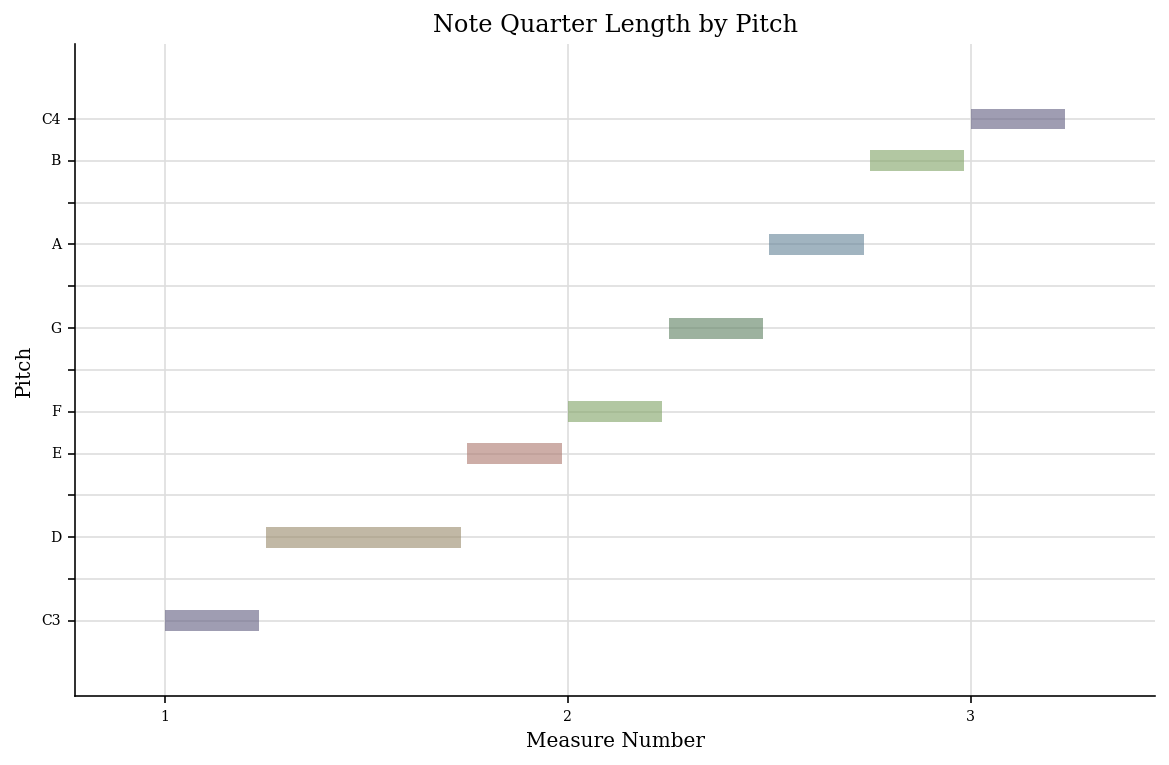

In [4]:
s.plot()

In [6]:
s.show('midi')

In [10]:
import os
import subprocess

def to_audio(midi_file, sf2="GeneralUser/GeneralUser.sf2",
             out_dir=".", out_type='wav', txt_file=None, append=True):
    """ 
    Convert a single midi file to an audio file.  If a text file is specified,
    the first line of text in the file will be used in the name of the output
    audio file.  For example, with a MIDI file named '01.mid' and a text file
    with 'A    major', the output audio file would be 'A_major_01.wav'.  If
    append is false, the output name will just use the text (e.g. 'A_major.wav')
    
    Args:
        midi_file (str):  the file path for the .mid midi file to convert
        sf2 (str):        the file path for a .sf2 soundfont file
        out_dir (str):    the directory path for where to write the audio out
        out_type (str):   the output audio type (see 'fluidsynth -T help' for options)
        txt_file (str):   optional text file with additional information of how to name 
                          the output file
        append (bool):    whether or not to append the optional text to the original
                          .mid file name or replace it
    """
    fbase = os.path.splitext(os.path.basename(midi_file))[0]
    if not txt_file:
        out_file = out_dir + '/' + fbase + '.' + out_type
    else:
        line = 'out'
        with open(txt_file, 'r') as f:
            line = re.sub(r'\s', '_', f.readline().strip())
            
        if append:
            out_file = out_dir + '/' + line + '_' + fbase + '.' + out_type
        else:
            out_file = out_dir + '/' + line + '.' + out_type

    subprocess.call(['fluidsynth', '-T', out_type, '-F', out_file, '-ni', sf2, midi_file])

# pretty_midi

In [37]:
import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
# import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# For putting audio in the notebook
import IPython.display

In [19]:
pm = pretty_midi.PrettyMIDI(initial_tempo=80)

In [21]:
print(pm.instruments)

[]


In [22]:
# Let's add a Cello instrument, which has program number 42.
# pretty_midi also keeps track of whether each instrument is a "drum" instrument or not
# because drum/non-drum instruments share program numbers in MIDI.
# You can also optionally give the instrument a name,
# which corresponds to the MIDI "instrument name" meta-event.
inst = pretty_midi.Instrument(program=42, is_drum=False, name='my cello')
pm.instruments.append(inst)

In [23]:
# Let's add a few notes to our instrument
velocity = 100
for pitch, start, end in zip([60, 62, 64], [0.2, 0.6, 1.0], [1.1, 1.7, 2.3]):
    inst.notes.append(pretty_midi.Note(velocity, pitch, start, end))
print(inst.notes)

[Note(start=0.200000, end=1.100000, pitch=60, velocity=100), Note(start=0.600000, end=1.700000, pitch=62, velocity=100), Note(start=1.000000, end=2.300000, pitch=64, velocity=100)]


In [26]:
# We'll just do a 1-semitone pitch ramp up
n_steps = 512
bend_range = 8192//2
for time, pitch in zip(np.linspace(1.5, 2.3, n_steps),
                       range(0, bend_range, bend_range//n_steps)):
    inst.pitch_bends.append(pretty_midi.PitchBend(pitch, time))

In [38]:
# def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
#     # Use librosa's specshow function for displaying the piano roll
#     librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
#                              hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
#                              fmin=pretty_midi.note_number_to_hz(start_pitch))

# plt.figure(figsize=(8, 4))
# plot_piano_roll(pm, 56, 70)
# # Note the blurry section between 1.5s and 2.3s - that's the pitch bending up!

In [39]:
IPython.display.Audio(pm.synthesize(fs=16000), rate=16000)